In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


vendas = np.array([35, 28, 34, 38, 40, 37, 41, 33, 36, 29,
          31, 32, 34, 39, 40, 30, 29, 36, 32, 33,
          35, 37, 39, 40, 38, 36, 35, 37, 34, 36])
vendas

array([35, 28, 34, 38, 40, 37, 41, 33, 36, 29, 31, 32, 34, 39, 40, 30, 29,
       36, 32, 33, 35, 37, 39, 40, 38, 36, 35, 37, 34, 36])

In [2]:
# Frequência absoluta
freq_abs = pd.Series(vendas).value_counts().sort_index()
freq_abs

28    1
29    2
30    1
31    1
32    2
33    2
34    3
35    3
36    4
37    3
38    2
39    2
40    3
41    1
Name: count, dtype: int64

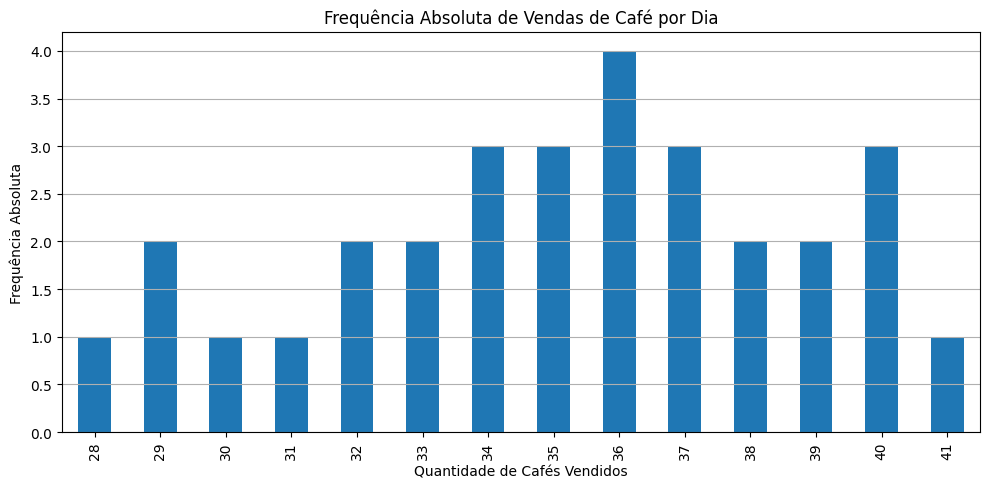

In [8]:
# Gráfico de barras da frequência absoluta
plt.figure(figsize=(10, 5))
freq_abs.plot(kind='bar')
plt.title("Frequência Absoluta de Vendas de Café por Dia")
plt.xlabel("Quantidade de Cafés Vendidos")
plt.ylabel("Frequência Absoluta")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [3]:
# Frequência relativa
freq_rel = (freq_abs / len(vendas))*100
freq_rel

28     3.333333
29     6.666667
30     3.333333
31     3.333333
32     6.666667
33     6.666667
34    10.000000
35    10.000000
36    13.333333
37    10.000000
38     6.666667
39     6.666667
40    10.000000
41     3.333333
Name: count, dtype: float64

In [4]:
# Frequência acumulada
freq_acum = freq_abs.cumsum()
freq_acum

28     1
29     3
30     4
31     5
32     7
33     9
34    12
35    15
36    19
37    22
38    24
39    26
40    29
41    30
Name: count, dtype: int64

In [5]:
# Tabela
tabela_freq = pd.DataFrame({
    "Qtd de Cafés": freq_abs.index,
    "Frequência Absoluta": freq_abs.values,
    "Frequência Relativa (%)": (freq_rel.values).round(2),
    "Frequência Acumulada": freq_acum.values
})

tabela_freq.reset_index(drop=True, inplace=True)
tabela_freq

,Qtd de Cafés,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
0,28,1,3.33,1
1,29,2,6.67,3
2,30,1,3.33,4
3,31,1,3.33,5
4,32,2,6.67,7
5,33,2,6.67,9
6,34,3,10.00,12
7,35,3,10.00,15
8,36,4,13.33,19
9,37,3,10.00,22


## Perguntas:
- Em quantos dias venderam menos que 30 cafés?
- Qual a proporção de dias em que venderam 40 ou mais cafés?
- Qual a frequência acumulada até 35 cafés?
- Qual foi a quantidade de cafés mais vendida?
- Quantos dias venderam entre 33 e 37 cafés (inclusive)?

In [6]:
# Respostas

p1 = (vendas < 30).sum()
p2 = ((vendas >= 40).sum() / len(vendas)) * 100
p3 = (vendas <= 35).sum()

moda = stats.mode(vendas, keepdims=True)
p4 = moda.mode[0]

p5 = ((vendas >= 33) & (vendas <= 37)).sum()

In [9]:
respostas = {
    "Dias com < 30 cafés": p1,
    "Proporção com >= 40 cafés (%)": round(p2, 2),
    "Freq. acumulada até 35 cafés": p3,
    "Moda (qtd mais vendida)": p4,
    "Dias com vendas entre 33 e 37": p5
}

df_respostas = pd.DataFrame([respostas])
df_respostas

,Dias com < 30 cafés,Proporção com >= 40 cafés (%),Freq. acumulada até 35 cafés,Moda (qtd mais vendida),Dias com vendas entre 33 e 37
0,3,13.33,15,36,15


# Queremos saber se a preferência por tipo de transporte (carro, ônibus ou bicicleta) é diferente entre dois bairros da cidade: Centro e Periferia.

Hipótese $H_0$: Existe uma preferência por transporte diferente entre os bairros?

In [12]:
df = pd.read_csv('../hands_on/qui-quadrado/preferencia_transporte.csv')
df.head()

,Bairro,Transporte
0,Centro,Carro
1,Centro,Bicicleta
2,Centro,Ônibus
3,Centro,Ônibus
4,Centro,Carro


## Teste Qui-quadrado

O teste de Qui-quadrado é um teste não paramétrico (teste estatístico não paramétrico cujo modelo não especifica condições sobre o parâmetro da população da qual a amostra é retirada). Muito utilizado para identificar a relação entre uma variável categórica e é denotado por **$\chi^2$:**.

$$\chi^2 = \sum_{i=1}^{n} \frac{(O_i - E_i)^2}{E_i}$$

**Onde:**

   **$\chi^2$:** Representa o valor calculado do Qui-Quadrado. Quanto maior esse valor, maior a discrepância entre as frequências observadas e esperadas, sugerindo uma maior probabilidade de associação.
   
   **$O_i$:** Corresponde à frequência observada em cada categoria ou célula da sua amostra de dados. São os dados reais que você coletou.
    
   **$E_i$:** Corresponde à frequência esperada para cada categoria ou célula, sob a hipótese de que não há associação (independência) entre as variáveis. Em outras palavras, é a frequência que esperaríamos ver se as variáveis fossem independentes.
   
   **$n$:** É o número total de categorias ou o número de células na sua tabela de contingência.

   **$\sum$:** Indica o somatório, significando que o cálculo $\frac{(O_i - E_i)^2}{E_i}$ deve ser realizado para cada categoria (ou célula da tabela de contingência) e os resultados somados.


**Problema:**
Queremos saber se a preferência por tipo de transporte (carro, ônibus, bicicleta) é diferente entre dois bairros da cidade.

“A escolha de transporte depende do bairro?”

In [24]:
df.describe()

,Bairro,Transporte
count,300,300
unique,2,3
top,Centro,Ônibus
freq,150,159


In [15]:
# Tabela de contingência

contingencia = pd.crosstab(df['Bairro'], df['Transporte'])
contingencia

Transporte,Bicicleta,Carro,Ônibus
Bairro,,,
Centro,22,75,53
Periferia,15,29,106


<Figure size 800x600 with 0 Axes>

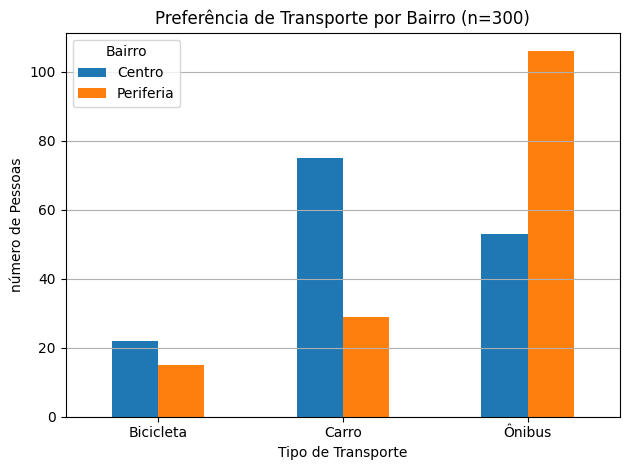

In [19]:
# Teste do Qui-quadrado

chi2_full, p_full, dof_full, expected_full = stats.chi2_contingency(contingencia)

# Plotando grafico agrupado
plt.figure(figsize=(8, 6))
contingencia.T.plot(kind='bar')
plt.title("Preferência de Transporte por Bairro (n=300)")
plt.ylabel("número de Pessoas")
plt.xlabel("Tipo de Transporte")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [20]:
expected_full

array([[18.5, 52. , 79.5],
       [18.5, 52. , 79.5]])

In [21]:
chi2_full

np.float64(39.337144837144834)

In [22]:
p_full

np.float64(2.8710947940467883e-09)

In [23]:
dof_full

2

In [25]:
# Conclusão:

conclusao = (
    "Rejeita H0: Preferência por transporte diferente entre bairros"
    if p_full < 0.05 else
    "Não rejeitar H0: Sem diferença significativa entre os bairros"
)
(contingencia, f"valor-p: {p_full:.4f}", conclusao)

(Transporte  Bicicleta  Carro  Ônibus
 Bairro                              
 Centro             22     75      53
 Periferia          15     29     106,
 'valor-p: 0.0000',
 'Rejeita H0: Preferência por transporte diferente entre bairros')

## p-Value

- O mundo pode ser dividido em dois estados: hipótese nula verdadeira e hipótese nula falsa;
- Assumimos inicialmente que a hipótese nula é verdadeira;
- Especificamos um modelo estatístico que mostra a probabilidade de diferentes resultados sob a hipótese nula;
- Definimos um nível de significância para determinar quando devemos nos surpreender;
- Coletamos dados e calculamos o valor de p;
- Comparamos o valor de p com o alfa para decidir se rejeitamos ou não a hipótese nula. Se p for menor ou igual ao alfa, rejeitamos a hipótese nula. Se p for maior que alfa, não rejeitamos a hipótese nula.

In [27]:
from scipy.stats import chi2

# Calcular o p-valor com a distribuição Qui-quadrado
valor_chi2 = chi2_full
df = dof_full
p_value = 1 - chi2.cdf(valor_chi2, df)

p2 = p_value * (10**(-9))
saida_formatada = "{:,.20f}".format(p2).replace(",","x").replace(".",",").replace("x",",")

print('P-Value: ', p_value)
print('Saída formatada: ',saida_formatada)

P-Value:  2.8710948063448427e-09
Saída formatada:  0,00000000000000000287


## Replicando essa mesma análise.

Uma empresa com funcionários distribuídos em dois turnos (Manhã e Noite), está interessada em verificar se existe uma associação entre o turno de trabalho e o tipo de refei'ão preferida no refeitório da empresa.

Encontre qual será sua Hipótese nula $H_0$ e apresente se a mesma deve ser aceita ou rejeitada.

## Problema 2: Nivel de satisfação com ensino remoto por curso.

Apresente o resultado de sua análise.

In [ ]:
!pwd

/Users/claytonpereira/Aulas_Unesp/ds/aulas25/DS_Unesp/aulas/exemplos
